# Visualizacion y exploracion de los datos

#### Importando Librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import GridSearchCV

#### Importando Datos 

In [2]:
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')#1-1460
df_test= pd.read_csv('house-prices-advanced-regression-techniques/test.csv')#1460-2919
#importar los datos

Analizando el precio de venta de las casas (columna 'SalesPrice')

In [3]:
print("Resumen estadistico de los datos de venta\n")
print(df_train['SalePrice'].describe())
#Hacer un análisis estadístico de la columna que nos interesa.

Resumen estadistico de los datos de venta

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


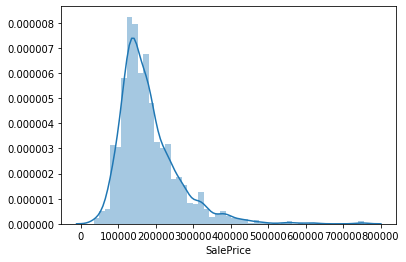

In [4]:
sns.distplot(df_train['SalePrice']);
#Crea un histograma de la columna del precio

In [5]:
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
#que tan aplastada está la curva de los datos

Kurtosis: 6.536282


## Realacion entre variables numéricas

#### Relacion entre 'GrLivArea' y 'SalePrice'. 

Donde 'GrLivArea' indica la superficie habitable por encima del nivel del suelo (en pies cuadrados).

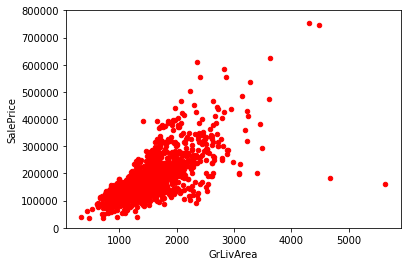

In [6]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
#concatena dos columnas, en este caso SalePrice y GrLivArea
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000),c='red');
#Grafica un diagrama de disperción de las variables GrLivArea, vista como la
#abscisa, y SalePrice como la ordenada.

#### Relacion entre 'GarageCars' y 'SalePrice'. 

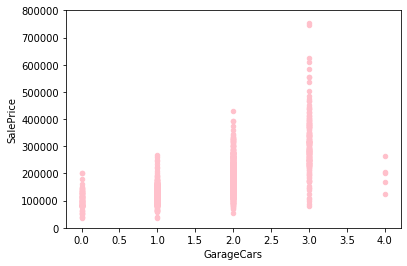

In [7]:
data = pd.concat([df_train['SalePrice'], df_train['GarageCars']], axis=1)
#concatena dos columnas, en este caso SalePrice y GrLivArea
data.plot.scatter(x='GarageCars', y='SalePrice', ylim=(0,800000),c='pink');
#Grafica un diagrama de disperción de las variables GrLivArea, vista como la
#abscisa, y SalePrice como la ordenada.

#### Relacion entre 'TotalBsmtSF' y 'SalePrice'. 

Donde 'TotalBsmtSF' indica el total de pies cuadrados de superficie de sótano

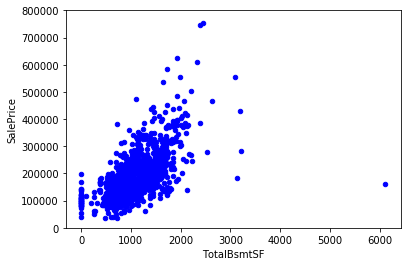

In [8]:
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
#concatena SalePrice y TotalBsmtSF
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000),c='blue');
#Crea un gráfico de disperción de dichas variables

## Relación entre variables categóricas

#### Relacion entre 'OverallQual' y 'SalePrice'. 

Donde 'OverallQual' indica la calificacion que se le dió al material y al acabado general de la casa. <br>
10:Muy excelente<br>
9:Excelente<br>
8:Muy bueno<br>
7:Bueno<br>
6:Por encima de la media<br>
5:Media<br>
4:Por debajo de la media<br>
3:Regular<br>
2:Malos<br>
1:Muy deficiente

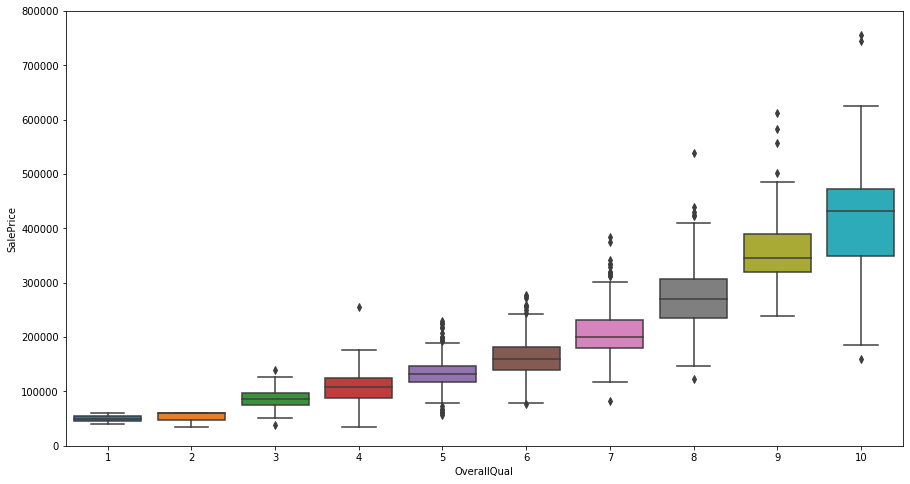

In [9]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
#concatenamos
f, ax = plt.subplots(figsize=(15, 8))#tamaño de la grafica
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
#crea un diagrama de caja
fig.axis(ymin=0, ymax=800000);
#mínimo y máximo del eje y

#### Relacion entre 'YearBuilt' y 'SalePrice'. 

Donde 'YearBuilt' indica la fecha de construcción original.

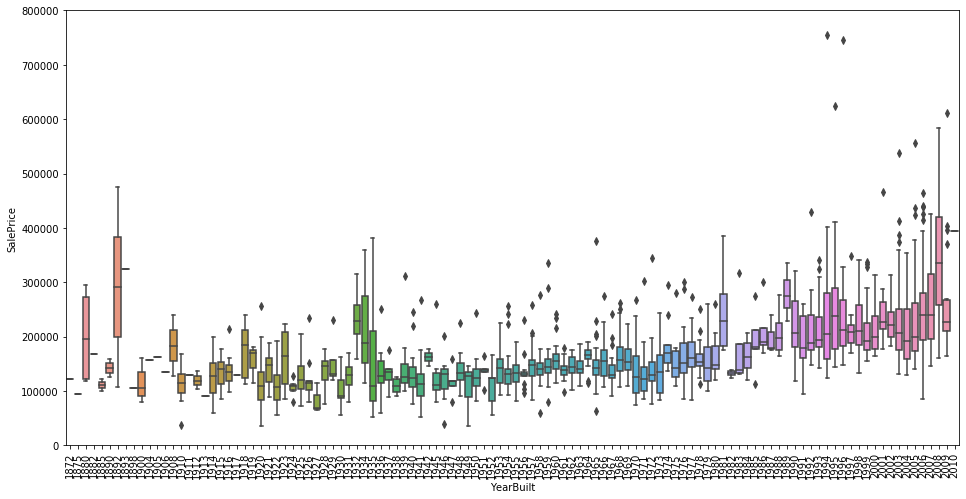

In [10]:
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
#concatenamos
f, ax = plt.subplots(figsize=(16, 8))#tamaño de la grafica
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
#creamos un diagrama de caja
fig.axis(ymin=0, ymax=800000);#limites
plt.xticks(rotation=90);

Aunque no se tiene una tendencia muy marcada, se puede apreciar levemente que la gente es más propensa a gastar más dinero en cosas nuevas que en viejas.

'GrLivArea' y 'TotalBsmtSF' parecen estar relacionados linealmente con 'SalePrice'. Ambas relaciones son positivas, lo que significa que cuando una variable aumenta, la otra también lo hace. En el caso de 'TotalBsmtSF', se observa que la pendiente de la relación lineal es bastante elevada.
'OverallQual' y 'YearBuilt' también parecen estar relacionados con "SalePrice". La relación parece ser más fuerte en el caso de 'OverallQual', donde el gráfico de caja muestra cómo los precios de venta aumentan con la calidad general.

#### Relacion entre 'MSZoning' y 'SalePrice'. 

Donde 'MSZoning' identifica la clasificación urbanística general de la venta.<br>
A	Agricoloa<br>
C	Comercial<br>
FV	Residencial Pueblo Flotante<br>
I	Industrial<br>
RH	Residencial de alta densidad<br>
RL	Residencial de baja densidad<br>
RP	Parque residencial de baja densidad <br>
RM	Residencial de media densidad<br>

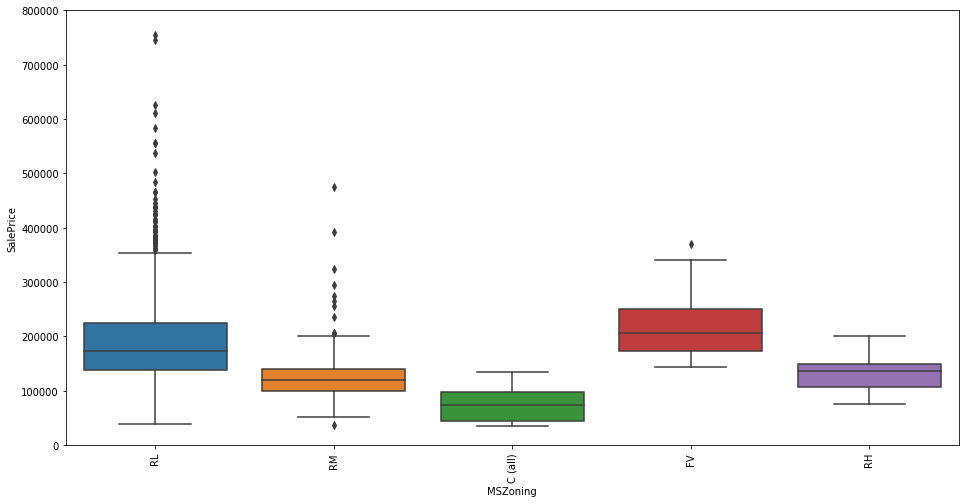

In [11]:
data = pd.concat([df_train['SalePrice'], df_train['MSZoning']], axis=1)
#concatenamos
f, ax = plt.subplots(figsize=(16, 8))#tamaño de la grafica
fig = sns.boxplot(x='MSZoning', y="SalePrice", data=data)
#creamos un diagrama de caja
fig.axis(ymin=0, ymax=800000);#limites
plt.xticks(rotation=90);

## Matriz de Corelación 

Hasta ahora analizamos las variables que nos parecíeron importantes a nosotras. Pero esto es subjetivo. Para saber cuales son las variables que realmente nos interesan utilizaremos la matriz de correlación.

In [12]:
(df_train.corr()**2)['SalePrice'].sort_values(ascending=False)[:20]
#variables más realicionadas con SalePrice

SalePrice       1.000000
OverallQual     0.625652
GrLivArea       0.502149
GarageCars      0.410124
GarageArea      0.388667
TotalBsmtSF     0.376481
1stFlrSF        0.367057
FullBath        0.314344
TotRmsAbvGrd    0.284860
YearBuilt       0.273422
YearRemodAdd    0.257151
GarageYrBlt     0.236548
MasVnrArea      0.228000
Fireplaces      0.218023
BsmtFinSF1      0.149320
LotFrontage     0.123763
WoodDeckSF      0.105244
2ndFlrSF        0.101974
OpenPorchSF     0.099765
HalfBath        0.080717
Name: SalePrice, dtype: float64

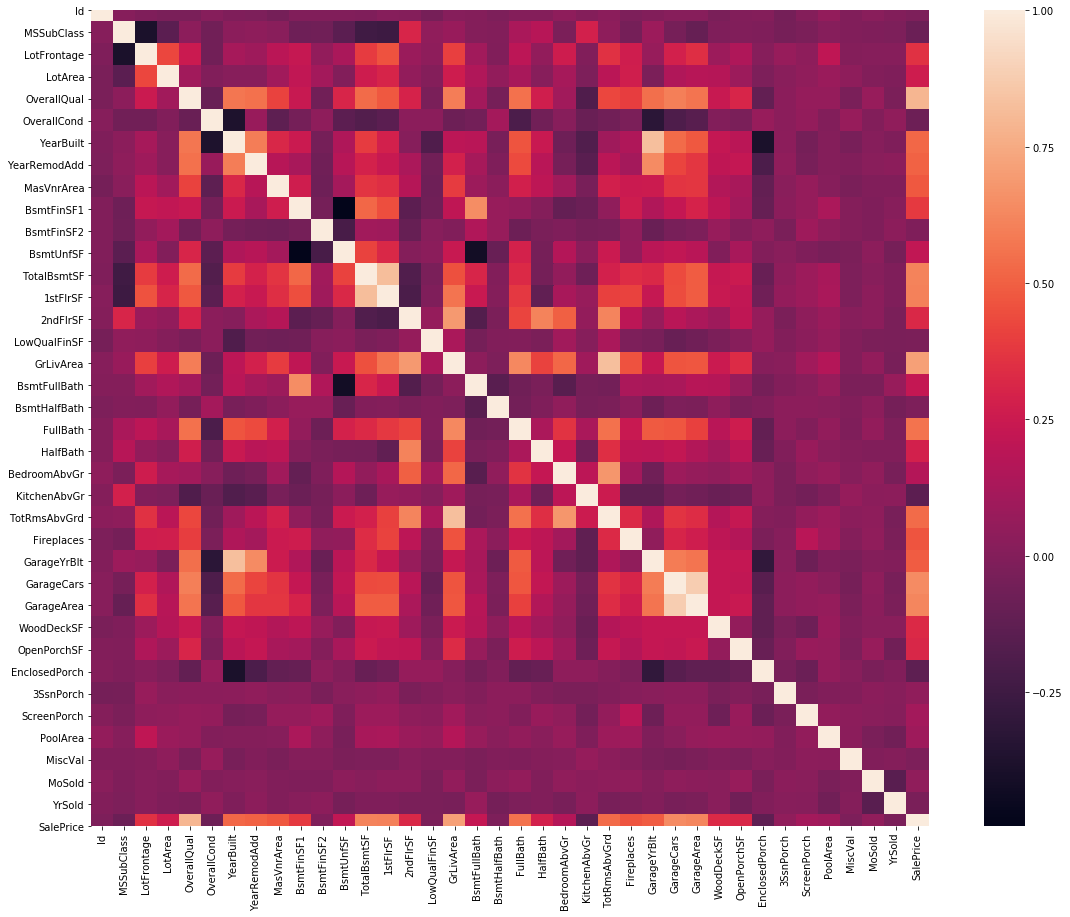

In [13]:
corrmat = df_train.corr()
#crea la matriz de correlación
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=1, square=True);
#crea un gráfico de calor usando la matriz de correlación

Hay dos cuadros grandes de color casi blanco que llaman la atención. 
El primero es el de la relacion entre las variables 'TotalBsmtSF' y '1stFlrSF.
El segundo es el de la relacion entre las variables 'GarageYrBlt', 'GarageCars' y 'GarageArea'. 
Ambos casos muestran lo significativa que es la correlación esas estas variables. La correlación es tan fuerte que puede indicar multicolinealidad. Estas variables dan casi la misma información por lo que la multicolinealidad realmente seria un problema. 
Tambien las relaciones de 'SalePrice'con 'GrLivArea', 'TotalBsmtSF', y 'OverallQual' parece que son muy importantes debido al color de sus recuadros casi blancos.

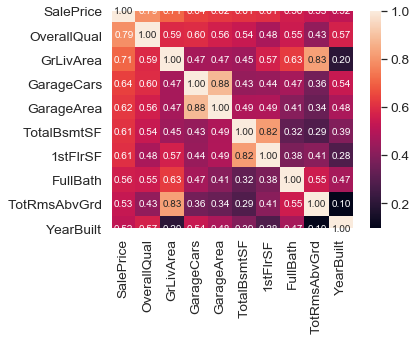

In [14]:
k = 10 #número de variables para el mapa de calor con acercamiento
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
#crea un zoom a la matriz de correlación anterior

Según la matriz de correlacion de 10 variables, estas son las variables más correlacionadas con la variable 'SalePrice'. 

'OverallQual', 'GrLivArea' y 'TotalBsmtSF' están fuertemente correlacionadas con 'SalePrice'. (Como se habia pensado anteriormente).
'GarageCars' y 'GarageArea' también son variables muy correlacionadas. Pero, el número de coches que caben en el garaje (GarageCars) es una consecuencia de la superficie de este (GarageArea). 'GarageCars' y 'GarageArea' son demasiado similares, por lo que, sólo se necesita una de estas variables en el análisis (se mantendrá 'GarageCars' ya que su correlación con 'SalePrice' es mayor).
'TotalBsmtSF' y '1stFloor' también estan muy correlacionadas. Por lo que nos quedamos solo con una, con 'TotalBsmtSF'.

En la primer grafica de calor, se ve un recuadro casi blanco, que indica que existe mucha corelacion entre las variables 'YearBuilt' y 'GarageYrBlt' (año en que se contruyó el garage). Parece sensato pensar que el año en el que se construyó la casa es igual o cercano al año en que se construyó el garage por lo que es informacion muy similar. Ya que 'YearBuilt' esta mas relacionada con 'SalePrice', eliminamos 'GarageYrBlt'.

## Scatter plots

Despues de decidir que variables son las que nos sirven, ahora haremos graficas de dispersión para ver que informacion nos dan.

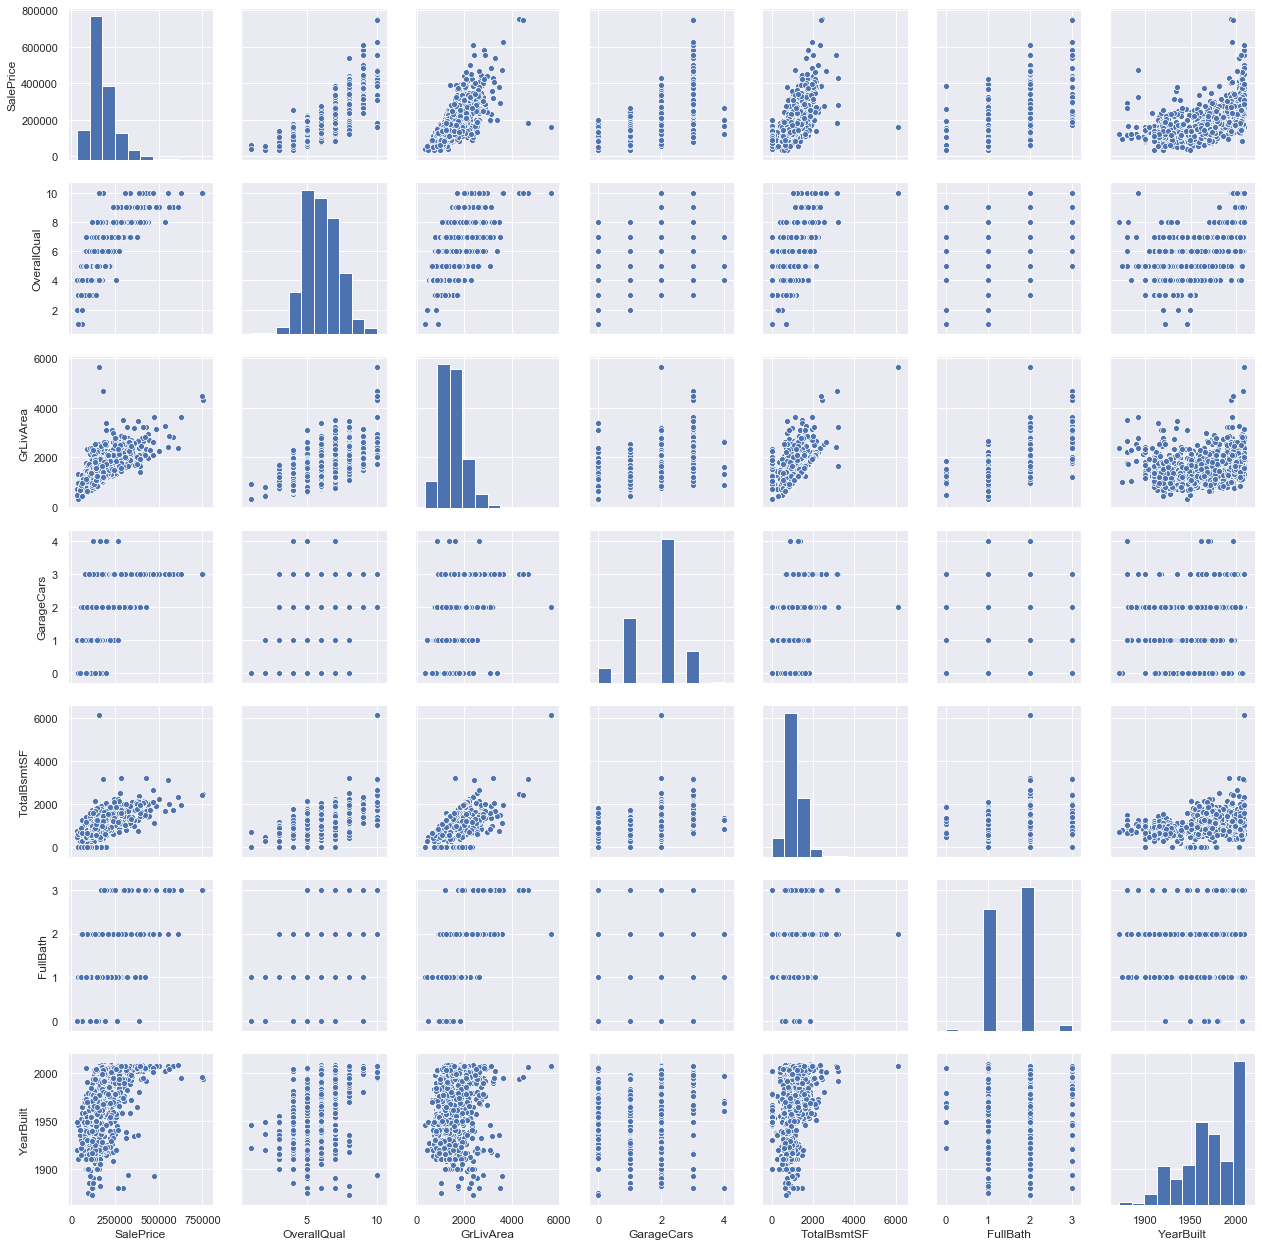

In [15]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();
#crea un gráfico de dispersión de las variables que elegimos

La gráfica de 'TotalBsmtSF' y 'GrLiveArea' se puede ver casi una línea recta en los puntos. Esto es lógico ya que la superficie de los sótanos pueden ser iguales a la superficie del terreno de la casa, pero no mayores.

La gráfica de 'SalePrice' y 'YearBuilt' parece una función exponencial. También se observa en el conjunto de puntos de los últimos años que los precios de las casas están aumentando cada vez más rápido.